In [1]:
# importing all required pakages and libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import SVR, SVC
import xgboost
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
sb.set()

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


##  Regression Problem

In [2]:
ds = pd.read_csv('avocado.csv')
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


### EDA and Data preprocessing

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


Here, we have null values and most data are numeric types. Also, we shall convert the dtype of Date column to Datetime format for further analysis.

In [4]:
ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Here, we have very large values to deal with and most of the data distribution may be skewed.

In [5]:
ds.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [6]:
# removing null value from all columns.
ds = ds.dropna()

In [7]:
# checking if there is any relation between 'Unnamed 0' column and 'Average price'
ds.corr().loc['AveragePrice','Unnamed: 0']

-0.07553138335413852

In [8]:
# Since there is no relation, so we shall remove it.
ds.drop('Unnamed: 0', 1, inplace = True)

In [9]:
# Converting 'Date' column dtype to Datetime format.
ds['Date'] = pd.to_datetime(ds['Date'])

In [10]:
# Extracting new feature 'month' from  'Date' column. 
ds['month'] = ds.Date.dt.month

In [11]:
# Mapping month to its name.
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ds['month_name'] = ds['month'].map(month_map)

In [12]:
# Extracting new feature 'dayofweek' from 'Date' column.
ds['dayofweek'] = ds.Date.dt.dayofweek

In [13]:
# Mapping dayofweek to its name.
weekday_map = {6:'sun', 5:'sat', 4:'fri', 3:'thu', 2:'wed', 1:'tue', 0: 'mon'}
ds['weekday_name'] = ds['dayofweek'].map(weekday_map)

In [14]:
ds

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,month_name,dayofweek,weekday_name
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,12,Dec,6,sun
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,12,Dec,6,sun
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,12,Dec,6,sun
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,6,Jun,4,fri
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,11,Nov,6,sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,10,Oct,6,sun
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,9,Sep,5,sat
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2,Feb,2,wed
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,9,Sep,6,sun


In [16]:
weekday_wise_avg_price = ds.groupby(['weekday_name']).AveragePrice.agg(['median'
                        ]).sort_values(['weekday_name']).rename(columns = {'median':'median_price'})

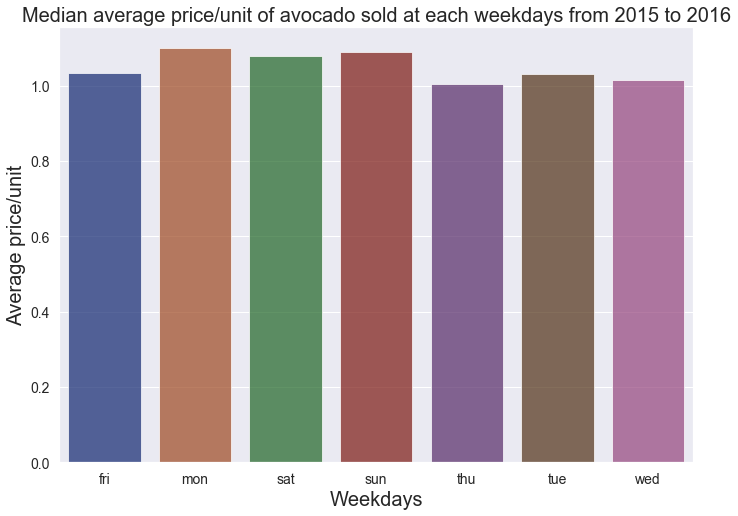

In [40]:
plt.figure(figsize = (25,8))


df = weekday_wise_avg_price.reset_index()[['weekday_name','median_price']]

plt.subplot(1,2,1)
sb.barplot(x = 'weekday_name' , y = 'median_price' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Average price/unit', fontsize =  20)
plt.xlabel('Weekdays' , fontsize = 20)
plt.title('Median average price/unit of avocado sold at each weekdays from 2015 to 2016', fontsize = 20 )
plt.show()

We can say that the median avacodo's price is highest during Mondays followed by Saturdays and lowest during Thursdays.

In [18]:
weekday_wise_total_sold = ds.groupby(['weekday_name'])['Total Volume'].agg(['sum'
                        ]).sort_values(['weekday_name']).rename(columns = {'sum':'tot_price'})

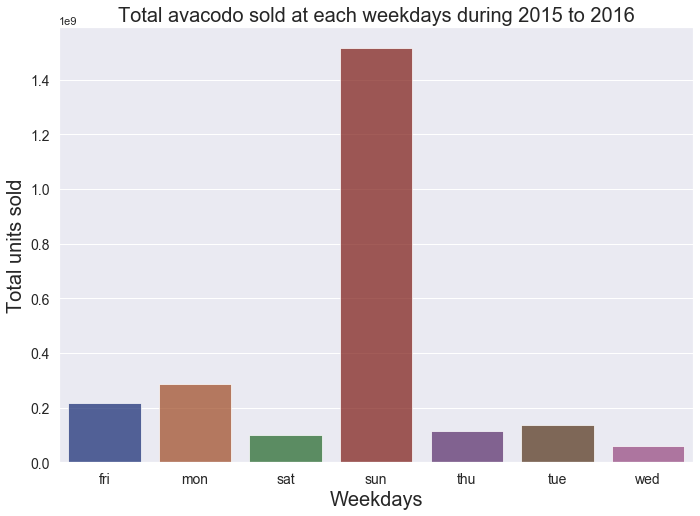

In [21]:
plt.figure(figsize = (25,8))


df = weekday_wise_total_sold.reset_index()[['weekday_name','tot_price']]

plt.subplot(1,2,1)
sb.barplot(x = 'weekday_name' , y = 'tot_price',data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Total units sold', fontsize =  20)
plt.xlabel('Weekdays' , fontsize = 20)
plt.title('Total avacodo sold at each weekdays during 2015 to 2016', fontsize = 20 )
plt.show()

We see during Sundays, avocados are sold the most by a very large margin, whereas, on Wednesdays the sales were least.

In [22]:
time_wise_avg_price = ds.groupby(['year','month','month_name']).AveragePrice.agg(['median'
                        ]).sort_values(['month'],ascending = True).rename(columns = {'median':'median_price'})

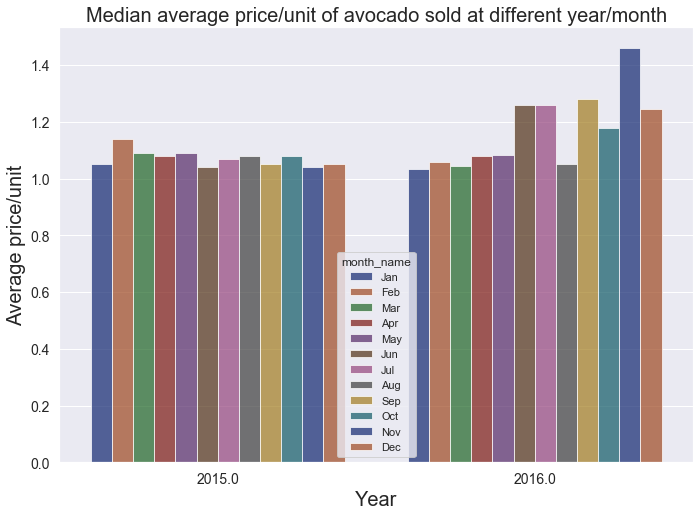

In [41]:
plt.figure(figsize = (25,8))
time_wise_avg_price

df = time_wise_avg_price.reset_index()[['year','month_name','month','median_price']]

plt.subplot(1,2,1)
sb.barplot(x = 'year' , y = 'median_price', hue = 'month_name' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Average price/unit', fontsize =  20)
plt.xlabel('Year' , fontsize = 20)
plt.title('Median average price/unit of avocado sold at different year/month', fontsize = 20 )
plt.show()

We can see, in 2015 the median average price/unit of avocado was the highest during February and lowest during  June and not much variation for other months.

However on 2016, we see a different trend, in which from May onwards we see an increasing trend having peak in November. 

In [42]:
time_wise_total_sold = ds.groupby(['year','month','month_name'])['Total Volume'].agg(['sum'
                        ]).sort_values(['month'],ascending = True).rename(columns = {'sum':'total unit sold'})

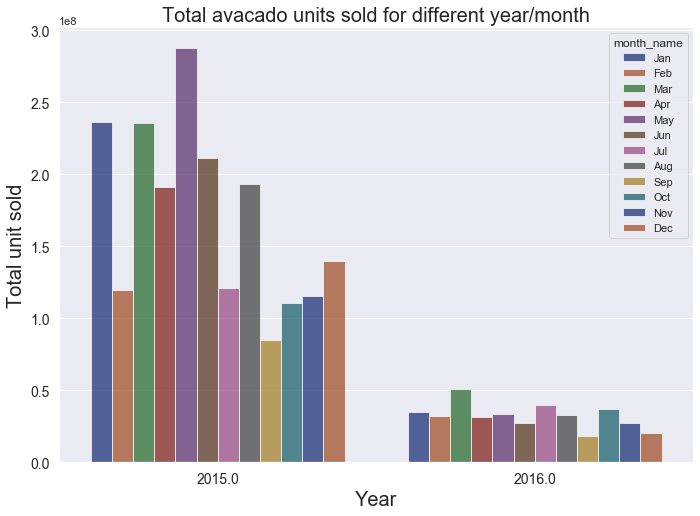

In [43]:
plt.figure(figsize = (25,8))
time_wise_avg_price

df = time_wise_total_sold.reset_index()[['year','month_name','total unit sold']]

plt.subplot(1,2,1)
sb.barplot(x = 'year' , y = 'total unit sold', hue = 'month_name' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Total unit sold', fontsize =  20)
plt.xlabel('Year' , fontsize = 20)
plt.title('Total avacado units sold for different year/month', fontsize = 20 )
plt.show()

On 2015, we many variations in total avocados sold, having highest sell on 2nd quater of the year and June being the peak selling month and September being lowest selling month.

On 2016, however, March was the highest selling month and September remained the lowest selling month as previous year.

In [30]:
region_wise_avg_price = ds.groupby(['region']).AveragePrice.agg(['median'
                        ]).sort_values(['median'],ascending = False).rename(columns = {'median':'median_price'})

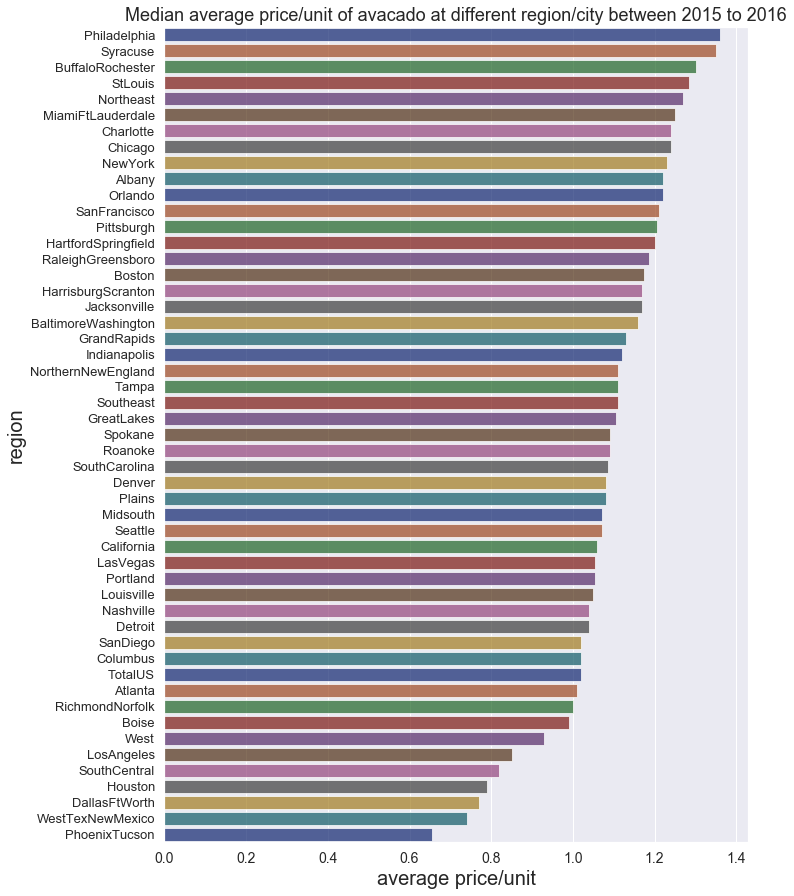

In [35]:
plt.figure(figsize = (23,15))
time_wise_avg_price

df = region_wise_avg_price.reset_index()[['region','median_price']]

plt.subplot(1,2,1)
sb.barplot(x = 'median_price' , y = 'region' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 13)
plt.ylabel('region', fontsize =  20)
plt.xlabel('average price/unit' , fontsize = 20)
plt.title('Median average price/unit of avacado at different region/city between 2015 to 2016', fontsize = 18 )
plt.show()

In [33]:
region_wise_total_sold = ds.groupby(['region'])['Total Volume'].agg(['sum'
                        ]).sort_values(['sum'],ascending = False).rename(columns = {'sum':'total unit sold'})

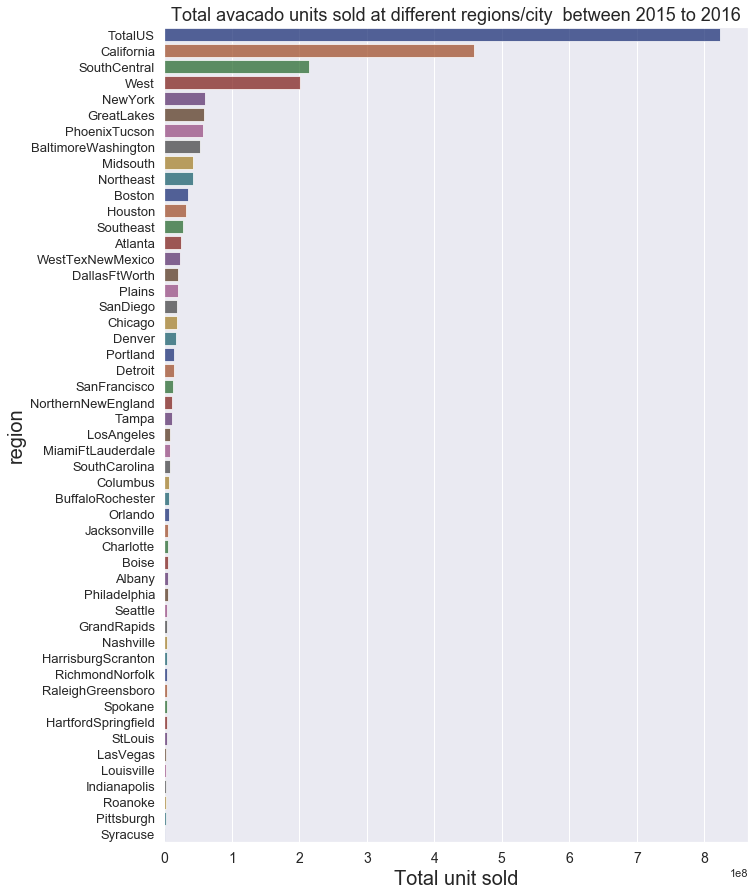

In [34]:
plt.figure(figsize = (23,15))
time_wise_avg_price

df = region_wise_total_sold.reset_index()[['region','total unit sold']]

plt.subplot(1,2,1)
sb.barplot(x = 'total unit sold' , y = 'region' ,data = df
           ,palette= 'dark', alpha = 0.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 13)
plt.ylabel('region', fontsize =  20)
plt.xlabel('Total unit sold' , fontsize = 20)
plt.title('Total avacado units sold at different regions/city  between 2015 to 2016', fontsize = 18 )
plt.show()

From above region/city plots, we can infer that regions  where avocado's  median average price/unit are low are having more number of sales compared to regions having higher average price/unit.

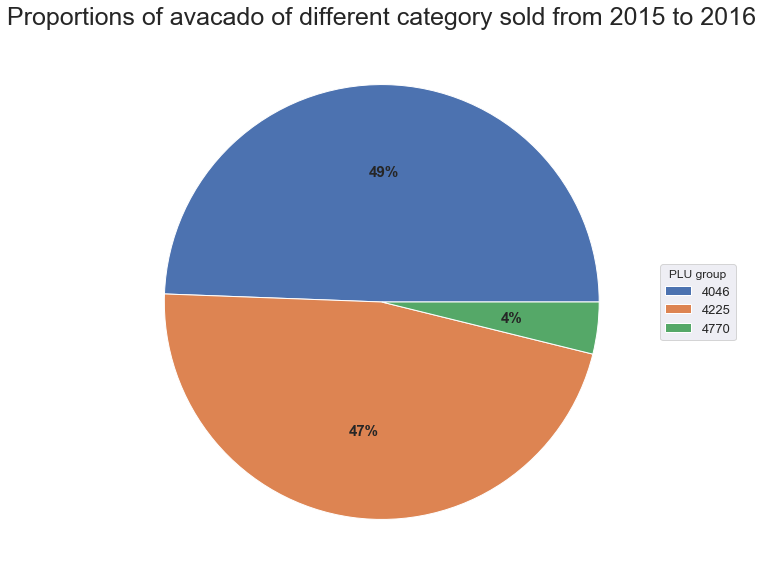

In [27]:
plu_list = ['4046','4225','4770']
sum_list = []
for col in plu_list:
    s = ds[col].sum()
    sum_list.append((col, s))
sum_list
sum_dict = dict(sum_list)
sum_dict
age_group_victims = pd.Series(sum_dict).sort_values(ascending = False)

plt.figure(figsize = (20,10))
wedges, texts, autotexts = plt.pie(age_group_victims, radius = 1,
       autopct ='%0.0f%%', textprops={'fontsize': 50})
plt.legend(wedges,age_group_victims.index,
          title="PLU group",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), prop = {'size':13}, fontsize = 50)
plt.setp(autotexts, size = 15, weight="bold")
plt.title('Proportions of avacado of different category sold from 2015 to 2016', fontsize = 25 )
plt.show()

Here, we can see PLU group 4770 was being sold significantly less then the other groups.

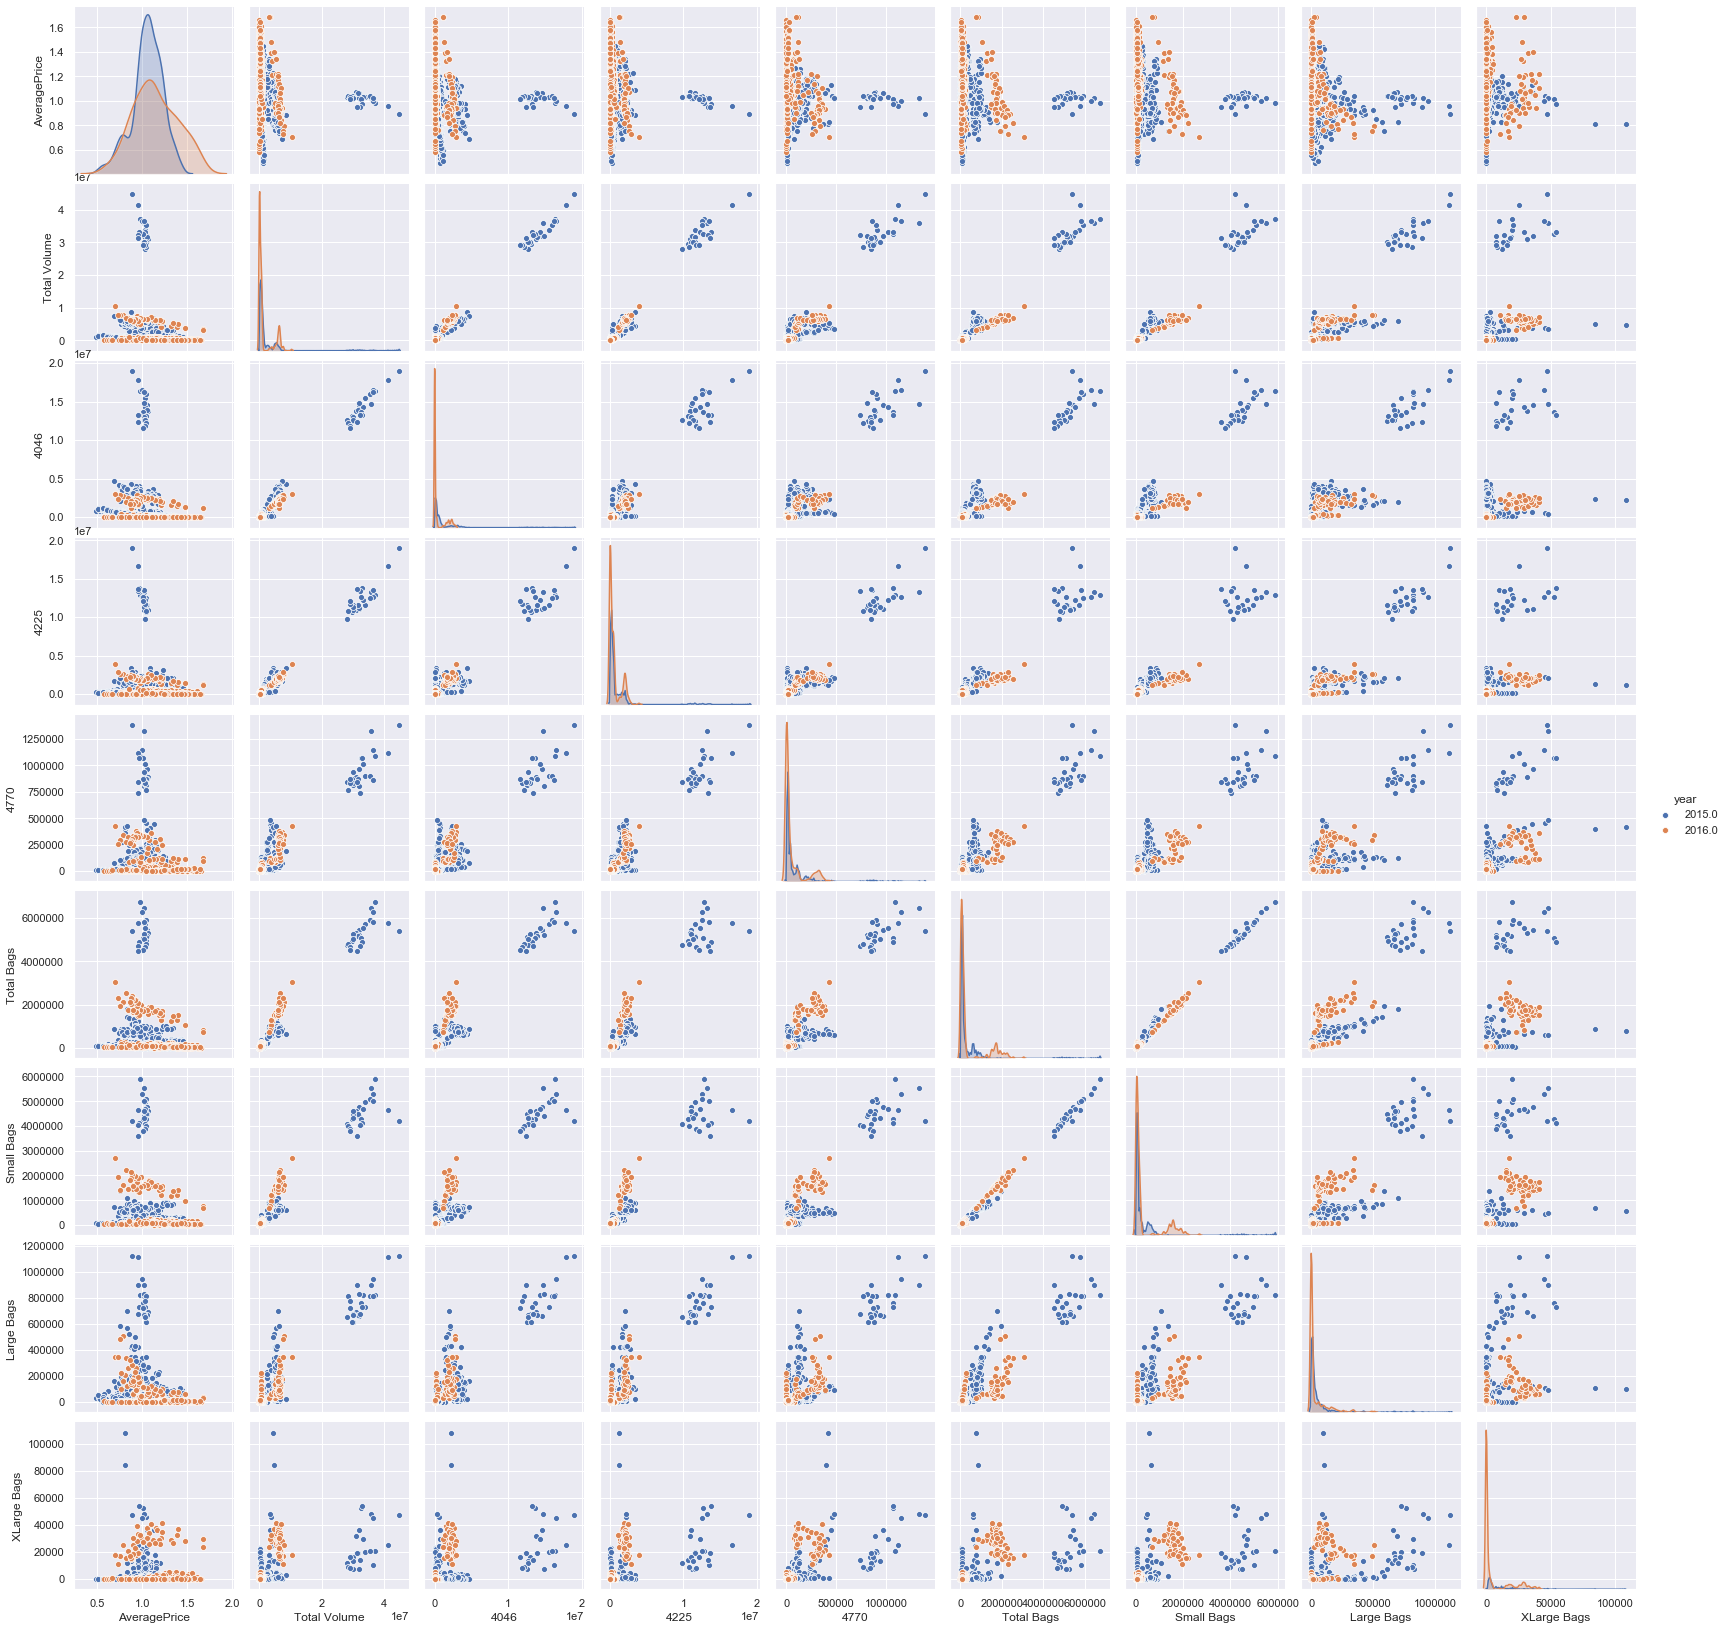

In [28]:
pairplot_feat = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags',
             'Large Bags','XLarge Bags','year']

sb.pairplot(ds[pairplot_feat], hue = 'year')

From above pairplot, we can see that their was much difference in trend in data from 2015 to 2016.

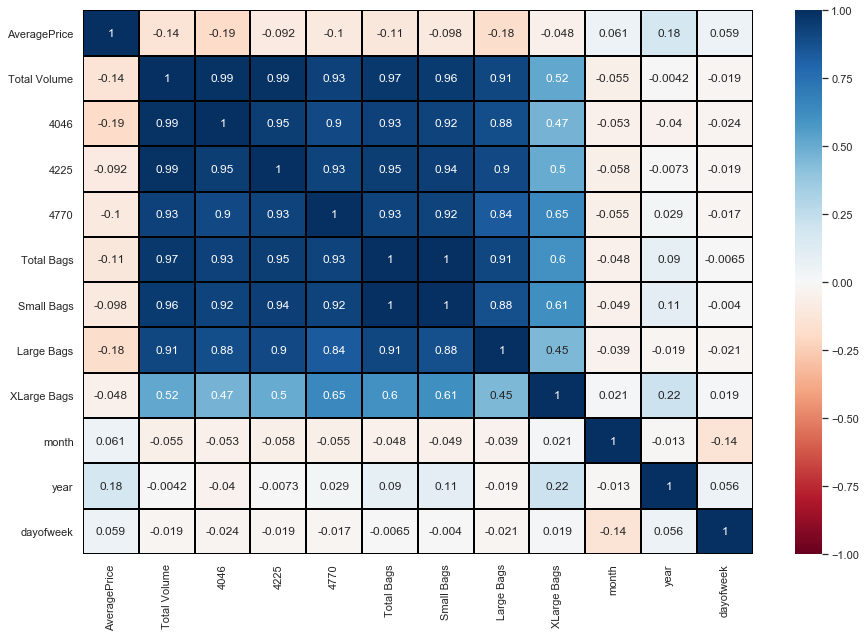

In [29]:
corr_feat = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags',
             'Large Bags','XLarge Bags','month','year', 'dayofweek']
plt.figure(figsize = (15,10))
sb.heatmap(ds[corr_feat].corr(), vmin = -1, vmax = 1, center = 0, cmap = 'RdBu',
          linewidth =1, linecolor = 'black', annot = True)

Here, we see many features are correlated with each out but almost no correlation with the target variable 'AveragePrice'.

Mostly we see, columns containing information about Total Volume sold are correlated to each other.

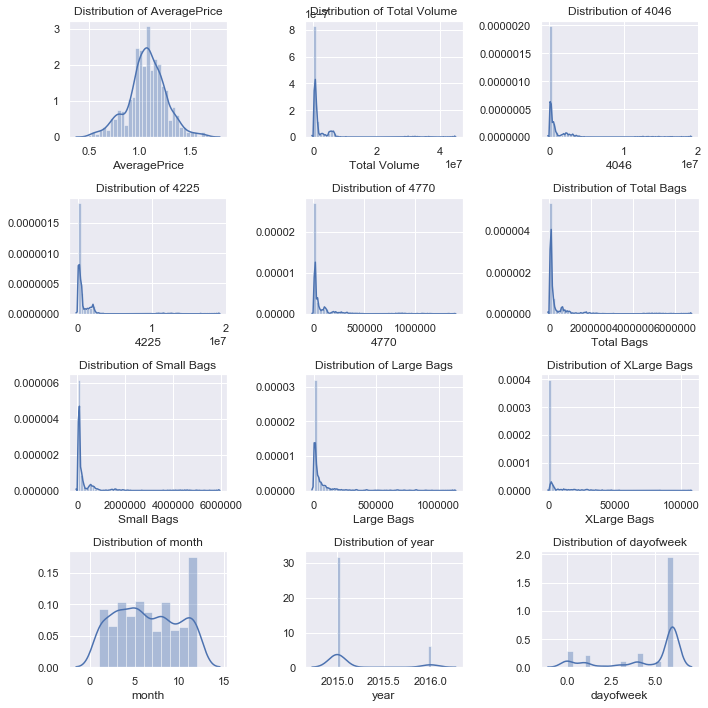

In [30]:
for i,col in enumerate(ds[corr_feat]):
    plt.subplot(4,3 ,i+1)
    sb.distplot(ds[col])
    plt.title('Distribution of '+col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

Here, we see that AveragePrice is normally distributed, whereas, others are highly skewed.

In [31]:
ds[corr_feat].skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
month           0.101439
year            1.828332
dayofweek      -1.297576
dtype: float64

In [32]:
# cube-root transforming features that are highly skewed.
for col in ['Total Volume','4046','4225','4770','4770','Total Bags','Small Bags','Large Bags',
               'XLarge Bags']:
    if abs(ds[col].skew()) > 0.55:
        ds[col] = (ds[col])**(1/3)

In [33]:
# Min-max scaling numeric features.
min_max_list = ['Total Volume','4046','4225','4770','4770','Total Bags','Small Bags','Large Bags',
               'XLarge Bags']

for col in min_max_list:
    ds[col] = MinMaxScaler().fit_transform( ds[col].values.reshape(-1,1))   

In [34]:
ds_new = ds.drop(['type','month','Date','dayofweek'], 1)

In [35]:
ds_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month_name,weekday_name
0,1.33,0.019348,0.009115,0.101276,0.319671,0.032531,0.033701,0.043652,0.000000,2015.0,Albany,Dec,sun
1,1.35,0.012966,0.003890,0.091729,0.326549,0.036087,0.037440,0.044304,0.000000,2015.0,Albany,Dec,sun
2,0.93,0.047484,0.005798,0.140124,0.357113,0.029977,0.030951,0.045144,0.000000,2015.0,Albany,Dec,sun
3,1.08,0.028252,0.010278,0.115789,0.334577,0.017664,0.017703,0.049230,0.000000,2015.0,Albany,Jun,fri
4,1.28,0.010140,0.007878,0.090891,0.336184,0.019829,0.019620,0.056077,0.000000,2015.0,Albany,Nov,sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,0.073953,0.119187,0.102999,0.615566,0.138634,0.130597,0.209813,0.130517,2016.0,Charlotte,Oct,sun
1513,1.51,0.069912,0.105733,0.099182,0.622600,0.143417,0.139118,0.197195,0.000000,2016.0,Charlotte,Sep,sat
1514,1.48,0.069969,0.108835,0.099839,0.612400,0.142344,0.137187,0.194573,0.196900,2016.0,Charlotte,Feb,wed
1515,1.47,0.073414,0.116172,0.100487,0.615424,0.144176,0.140435,0.194731,0.000000,2016.0,Charlotte,Sep,sun


In [36]:
# Here, we are trying to tune the smoothing parameter using cross validation on training-set.
# this is usually done to prevent the mean/target encoded data to overfit the training set. 

target_encoding_list = ['region', 'month_name', 'year', 'weekday_name']

x_train, x_test, y_train, y_test = train_test_split(ds_new.drop(['AveragePrice'], 1), 
                                                    ds_new.AveragePrice,
                                                test_size = 0.30, random_state = 42) 
score_list = []
smoothing_list = np.arange(0,5,.125)
model  =  xgboost.XGBRegressor(silent = True) # using xgboost model for tuning smoothing parameter.
for num in smoothing_list:
    x_train_en = x_train.copy()
    
    for col in target_encoding_list:
        

        encoder =  ce.TargetEncoder(cols = col, smoothing = num)
        x_train_en[col] = encoder.fit_transform(x_train_en[col], y_train)
    score = cross_val_score(model, x_train_en, y_train, cv = 10, scoring = 'r2', n_jobs = -1 ).mean()
    score_list.append(score)
        
print('Optimum cross-val-score:',max(score_list),
      'corresponds to smoothing value of:',smoothing_list[score_list.index(max(score_list))])    

Optimum cross-val-score: 0.7817116047158362 corresponds to smoothing value of: 4.375


In [69]:
# Splitting data into train-test set.
x_train, x_test, y_train, y_test = train_test_split(ds_new.drop(['AveragePrice'], 1), 
                                                    ds.AveragePrice,
                                                test_size = 0.30, random_state = 42) 

In [70]:
# target encoding features that are in target_encoding_list using tuned smoothing value.
for col in target_encoding_list:
    
        encoder =  ce.TargetEncoder(cols = col, smoothing =  4.375)
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

### Base Model Evaluation

model: RandomForestRegressor()
CV score:0.7866910914041343
score_std: 0.04464111213526991
----------
model: LinearRegression(normalize=True)
CV score:0.38695511192320275
score_std: 0.060853569837286375
----------
model: SVR()
CV score:0.10811969743433311
score_std: 0.030838217279586546
----------
model: AdaBoostRegressor()
CV score:0.6020493293891326
score_std: 0.047831214512716595
----------
model: GradientBoostingRegressor()
CV score:0.7272332458615551
score_std: 0.051064089207864746
----------
model: KNeighborsRegressor()
CV score:0.7976165842328673
score_std: 0.03456584332256659
----------
model: XGBRegressor(silent=True)
CV score:0.7236408501258242
score_std: 0.05158330905069877
----------
model: Lasso(normalize=True)
CV score:-0.00701813338735986
score_std: 0.00579267967885405
----------
model: Ridge(normalize=True)
CV score:0.2104094334770567
score_std: 0.037105344564617324
----------
model: ElasticNet()
CV score:0.019657040720182362
score_std: 0.010678399136012151
----------
mo

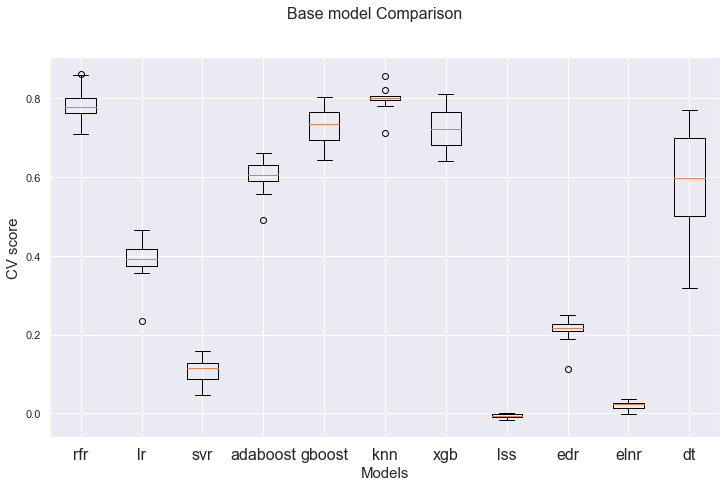

In [73]:
# inilializing different models
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor(silent = True)
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()
dt = DecisionTreeRegressor()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb','lss','edr','elnr','dt'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(12,7)
plt.show() 

From above boxplot, we select models- rfr, gboost, knn and xgboost as they performed better with higher mean and median. 
So, we will further tune these models to address any overfitting.

### Hyper-parameter tuning

In [40]:
# initializing parameters for each models for model-tuning.
param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5],
    max_depth = [ 2,3, 4, 5, 6,7, 8],
    n_estimators = [100, 150, 200,250,300],
    min_samples_split = [1,2,3], random_state = [40,41,42,43,44],
    alpha = [0.05,0.1,0.5,0.75,1,1.75,2])

param_rfr = dict(n_estimators = [10,15,20,25,30], criterion = ['mse', 'mae'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])

  
param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ],
     alpha = [0.05,0.1,0.5,0.75,1,1.75,2]
     )

param_knn = param_knn = dict(n_neighbors = np.arange(1,101,1), algorithm = ['auto','ball_tree','kd_tree','brute'],
                leaf_size = [25,30,35], p = [1,2], weights = ['uniform','distance'])

In [41]:
# model and parameter list.
model_param_list = [(gboost,param_gboost),(rfr,param_rfr), (xgb,param_xgb), (knn,param_knn)]

In [42]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_rearch = RandomizedSearchCV(model, param, cv = 10, n_jobs = -1, scoring = 'r2',
                                  random_state = 42)
    r_rearch.fit( x_train, y_train.values.ravel())
    best_cvscore = r_rearch.best_score_
    best_param = r_rearch.best_params_
    best_estimator = r_rearch.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: GradientBoostingRegressor()
best_cvscore: 0.8280015295884088
best_param: {'random_state': 40, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 6, 'learning_rate': 0.1, 'alpha': 0.05}


model: RandomForestRegressor()
best_cvscore: 0.8214809299795235
best_param: {'random_state': 43, 'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'mse'}


model: XGBRegressor(silent=True)
best_cvscore: 0.7984762667487637
best_param: {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.7, 'alpha': 1.75}


model: KNeighborsRegressor()
best_cvscore: 0.761771617363636
best_param: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'leaf_size': 35, 'algorithm': 'brute'}


best_estimators: [GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40), RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      ra

### Testing

In [43]:
# testing for train data
print('****TRAIN RESULTS****')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_pred, y_pred, squared = False))
    print('-------------------------------------------')

****TRAIN RESULTS****


model GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)
accuracy (r2_score): 99.83 %
root_mean_squared_error: 0.0
-------------------------------------------
model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 95.85 %
root_mean_squared_error: 0.0
-------------------------------------------
model XGBRegressor(alpha=1.75, colsample_bytree=0.7, gamma=0.0, max_depth=4,
             min_child_weight=5, silent=True)
accuracy (r2_score): 91.9 %
root_mean_squared_error: 0.0
-------------------------------------------
model KNeighborsRegressor(algorithm='brute', leaf_size=35, n_neighbors=7)
accuracy (r2_score): 84.42 %
root_mean_squared_error: 0.0
-------------------------------------------


In [44]:
#testing for test data
print('****TEST RESULTS****')
print('\n')

for model in best_estimator_list:
    model.fit( x_train, y_train)
    y_pred = model.predict( x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('-------------------------------------------')

****TEST RESULTS****


model GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)
accuracy (r2_score): 82.82 %
root_mean_squared_error: 0.07700147730930354
-------------------------------------------
model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 80.97 %
root_mean_squared_error: 0.08104785506416609
-------------------------------------------
model XGBRegressor(alpha=1.75, colsample_bytree=0.7, gamma=0.0, max_depth=4,
             min_child_weight=5, silent=True)
accuracy (r2_score): 79.01 %
root_mean_squared_error: 0.08511283755481237
-------------------------------------------
model KNeighborsRegressor(algorithm='brute', leaf_size=35, n_neighbors=7)
accuracy (r2_score): 76.88 %
root_mean_squared_error: 0.08932645686964792
-------------------------------------------


So, based on the above train and test results, GradientBoosting Model performed better on test data and therefore generelizes better on unseen data,  so we shall choose GradientBoosting Model as our regressor model in this project.

In [45]:
selected_model = GradientBoostingRegressor(alpha=0.05, max_depth=6, n_estimators=200,
                          random_state=40)
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

In [46]:
test_df = pd.DataFrame({'Actual price/unit':y_test.values,'Predicted price/unit':y_pred})

In [47]:
test_df.to_csv('avocado_price_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


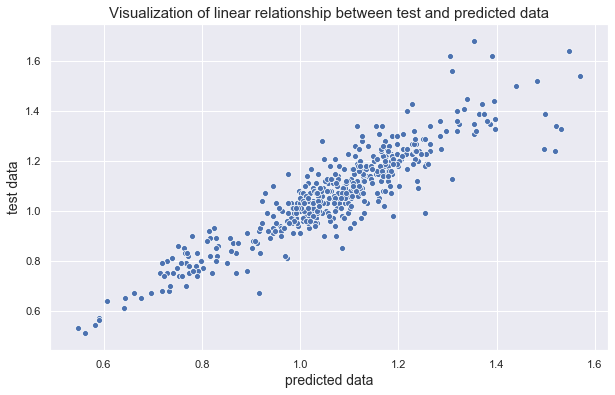

In [48]:
plt.figure(figsize = (10,6))
sb.scatterplot(y_pred,y_test )
plt.xlabel('predicted data', fontsize = 14)
plt.ylabel('test data',  fontsize = 14)
plt.title('Visualization of linear relationship between test and predicted data',fontsize = 15 )
plt.show()

As we can probably fit a straight line through above scatter plot, this implies our regression model performs  good.

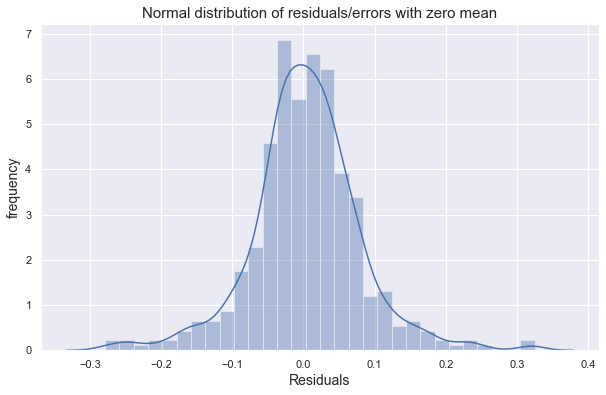

In [49]:
plt.figure(figsize = (10,6))
sb.distplot((y_test-y_pred), bins = 30)
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('frequency',  fontsize = 14)
plt.title('Normal distribution of residuals/errors with zero mean',fontsize = 15 )
plt.show()

Also, from above plot, errors or residuals between predicted and test datas are almost normally distributed with zero mean, which is a good sign for regression model.

In [50]:
# Saving the final model as gradient-boost for regression problem.
import joblib

joblib.dump(selected_model, 'avocado_price_pred.obj')
print('Model successfully saved.')

Model successfully saved.


## Classification Problem

In [51]:
# Label-encoding 'region' column as target feature.
ds_new['region'] = LabelEncoder().fit_transform(ds_new['region'])

In [52]:
# Here again, we are trying to tune the smoothing parameter using cross validation on training-set.
# for classification task.

target_encoding_list = ['month_name', 'year', 'weekday_name']

x_train, x_test, y_train, y_test = train_test_split(ds_new.drop(['region'], 1), 
                                                    ds_new.region,
                                                test_size = 0.30, random_state = 42) 
score_list = []
smoothing_list = np.arange(0,5,.125)
model  =  xgboost.XGBClassifier(silent = True) # using xgboost model for tuning smoothing parameter.
for num in smoothing_list:
    x_train_en = x_train.copy()
    
    for col in target_encoding_list:
        

        encoder =  ce.TargetEncoder(cols = col, smoothing = num)
        x_train_en[col] = encoder.fit_transform(x_train_en[col], y_train)
    score = cross_val_score(model, x_train_en, y_train, cv = 10, scoring = 'accuracy', n_jobs = -1 ).mean()
    score_list.append(score)
        
print('Optimum cross-val-score:',max(score_list),
      'corresponds to smoothing value of:',smoothing_list[score_list.index(max(score_list))])    

Optimum cross-val-score: 0.9226944101569389 corresponds to smoothing value of: 0.0


Here, we got 0 as smoothing value, but we shall use little larger than zero as per the decumentation of target encoder class. 

In [76]:
# splitting into train-test set.
x_train, x_test, y_train, y_test = train_test_split(ds_new.drop(['region'], 1), 
                                                    ds_new.region,
                                                test_size = 0.30, stratify = ds_new.region.values
                                                    ,random_state = 42) 


In [77]:
# target encoding features that are in target_encoding_list using tuned smoothing value as 0.01.
for col in target_encoding_list:
    
        encoder =  ce.TargetEncoder(cols = col, smoothing =  0.01)
        x_train[col] = encoder.fit_transform(x_train[col], y_train)
        x_test[col] = encoder.transform(x_test[col])

In [78]:
k = StratifiedKFold(n_splits= 10)

### Base Model Evaluation

model: RandomForestClassifier()
CV score:0.965103156409804
score_std: 0.012709807722624153
----------
model: LogisticRegression()
CV score:0.2902662669723152
score_std: 0.036004779421656995
----------
model: SVC()
CV score:0.07352318815023805
score_std: 0.012554092558235058
----------
model: AdaBoostClassifier()
CV score:0.09050432022570976
score_std: 0.02125135616066639
----------
model: GradientBoostingClassifier()
CV score:0.8878328337153942
score_std: 0.02443643144745373
----------
model: KNeighborsClassifier()
CV score:0.2629606771292541
score_std: 0.024035190874886158
----------
model: XGBClassifier(silent=True)
CV score:0.9160906365720332
score_std: 0.027216296643944933
----------
model: DecisionTreeClassifier()
CV score:0.8586228178451772
score_std: 0.02668622429038127
----------


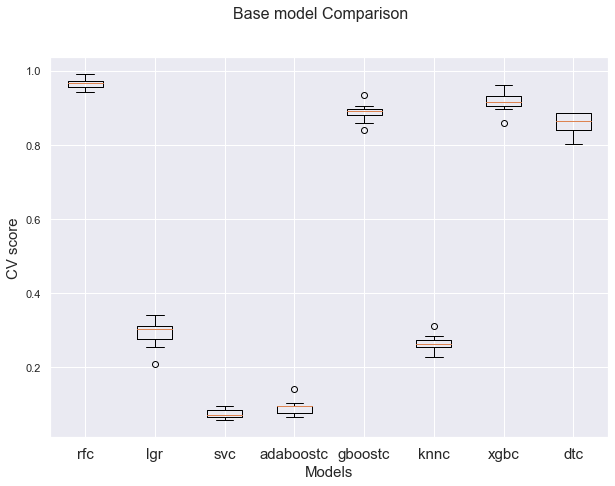

In [79]:
rfc = RandomForestClassifier()
svc = SVC()
lgr = LogisticRegression()
adaboostc =  AdaBoostClassifier()
gboostc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()
xgbc = xgboost.XGBClassifier(silent = True)
dtc = DecisionTreeClassifier()

models = [rfc, lgr, svc, adaboostc, gboostc, knnc, xgbc, dtc]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svc', 'adaboostc', 'gboostc', 'knnc', 'xgbc','dtc',],
                  fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

From above boxplot, it is clear that we can choose models- rfc, gboostc, xgbc and dtc for further tuning.

### Hyper-parameter tuning

In [83]:
# initializing parameters for each models for model-tuning.
param_gboostc =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2], random_state = [41,42,43])

param_xgbc = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ], alpha = [0.05,0.1,0.5,0.75,1,1.75,2],
                 reg_lambda = [0.05,0.1,0.5,0.75,1,1.75,2])

param_rfc = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,8,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

param_dtc = dict(criterion = ['gini', 'entropy'], splitter =['best', 'random'],
               max_depth = [2,3,4,5,6,7,8,None], min_samples_split = [2,3,4],
               min_samples_leaf = [1,2,3],  random_state = [41,42,43])

In [84]:
model_param_listc = [(gboostc,param_gboostc),(rfc,param_rfc), (xgbc,param_xgbc), (dtc,param_dtc)]

In [85]:
%%time
best_estimator_list = []
for model, param in model_param_listc:
    
    r_searchc = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'accuracy',
                                  random_state = 42)
    r_searchc.fit( x_train, y_train.values.ravel())
    best_cvscore = r_searchc.best_score_
    best_param = r_searchc.best_params_
    best_estimator = r_searchc.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: GradientBoostingClassifier()
best_cvscore: 0.9320931052724386
best_param: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 15, 'learning_rate': 0.15}


model: RandomForestClassifier()
best_cvscore: 0.9434314935637454
best_param: {'random_state': 43, 'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}


model: XGBClassifier(silent=True)
best_cvscore: 0.9359019573267501
best_param: {'reg_lambda': 0.05, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.4, 'alpha': 1.75}


model: DecisionTreeClassifier()
best_cvscore: 0.8322077235055545
best_param: {'splitter': 'best', 'random_state': 41, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'entropy'}


best_estimators: [GradientBoostingClassifier(learning_rate=0.15, max_depth=15, min_samples_leaf=2,
                           min_samples_split=3, n_estimat

### Testing

In [86]:

print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_train)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:', round(score*100,2))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TRAIN RESULTS*******


model GradientBoostingClassifier(learning_rate=0.15, max_depth=15, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=200,
                           random_state=42)
accuracy %: 100.0
------------------------------------------------------------------------------


model RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=30, random_state=43)
accuracy %: 99.53
------------------------------------------------------------------------------


model XGBClassifier(alpha=1.75, colsample_bytree=0.4, gamma=0.4, max_depth=10,
              min_child_weight=3, objective='multi:softprob', reg_lambda=0.05,
              silent=True)
accuracy %: 99.72
------------------------------------------------------------------------------


model DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=41)
accuracy %: 94.63
----------

In [87]:
print('*******TEST RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print('Model:',model,'\n')
    print('accuracy %:',round(score*100,2),'\n')
    print('Classification report:','\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------------------------------')
    print('\n')

*******TEST RESULTS*******


Model: GradientBoostingClassifier(learning_rate=0.15, max_depth=15, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=200,
                           random_state=42) 

accuracy %: 90.79 

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.94      0.91        16
           2       1.00      0.90      0.95        20
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        19
           5       1.00      0.80      0.89        15
           6       1.00      1.00      1.00        23
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         7
           9       1.00      0.93      0.96        14
          10       0.80      0.80      0.80         5
          11       0.88      1.00      0.93         7
          12       1.00

From above train and test results, and as because RandomForestClassifier model performed better than the rest in test data, thus, giving more confidence to test for unseen data, we shall choose RandomForest as our preferred model in this classification task.

In [62]:
# selecting the best performing model for classifiaction.
selected_classif_model = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       n_estimators=30, random_state=43) 
selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

In [63]:
test_df = pd.DataFrame({'actual region labels':y_test.values,'Predicted region label':y_pred})

In [64]:
test_df.to_csv('avocado_region_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [65]:
# Saving the final model as  RandomForestClassifier for classification problem.
import joblib

joblib.dump(selected_classif_model, 'avocado_region_pred.obj')
print('Model successfully saved.')

Model successfully saved.
